# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [2]:
minValue = 1
maxValue = 6
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

In [21]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [22]:
results

0    1
1    2
2    2
3    2
4    5
5    5
dtype: int32

<AxesSubplot:>

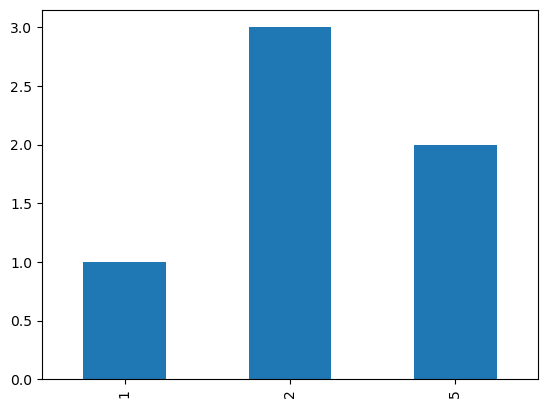

In [23]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [6]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 3 # Play with these values to show the impact on the histogram

In [7]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [8]:
randomLengths

0    184.758636
1    184.007788
2    189.900500
dtype: float64

<AxesSubplot:ylabel='Frequency'>

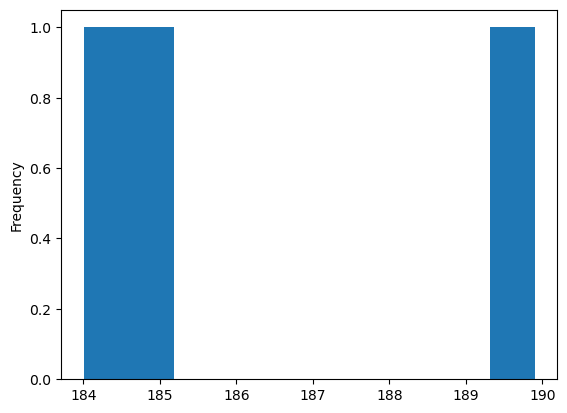

In [9]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [26]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

[179.24199546 171.25505466 188.09570733 185.85429218 166.249089
 182.65747685 167.36195172 172.02659869 162.49458076 188.14402183
 183.290275   184.31087396 182.85774518 167.77401341 178.67391575
 168.72126821 166.11165679 173.02246961 175.57571283 179.02262396
 174.16794453 176.21959736 182.40340197 181.13155072 162.41537827
 185.68556703 193.62871177 168.8246565  160.41166917 185.75831195
 169.11224802 172.67563058 171.56921959 178.54921559 179.27101272
 180.24503644 177.3807921  179.42994928 175.8310347  176.19584166
 182.92445228 175.62453212 183.60441491 172.00599727 177.52709297
 171.94545298 177.99237133 171.30221686 179.56155672 186.51536215
 180.09979187 162.72244261 174.05368868 150.28351671 183.49691651
 159.08945682 175.09484189 167.45093375 171.87902105 159.7731671
 166.50971046 167.35430966 175.50558993 175.95053554 168.32068781
 169.90756764 169.43158084 184.62791879 158.54529316 176.42817356
 170.48101755 175.19259179 175.29540438 168.54716369 171.06758375
 183.60879117

In [11]:
sampleMeans

[175.0307023728992,
 174.84928946536127,
 174.0481067798354,
 173.22941093152065,
 175.0864952059306,
 175.0205872569981,
 173.36656271486373,
 173.88358240381737,
 174.34233471505908,
 173.1101638270744]

<AxesSubplot:ylabel='Frequency'>

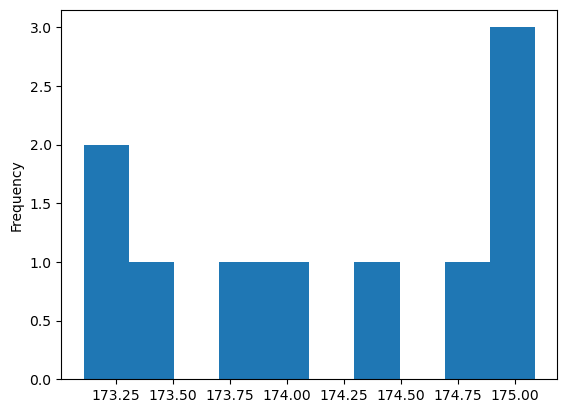

In [12]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [13]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

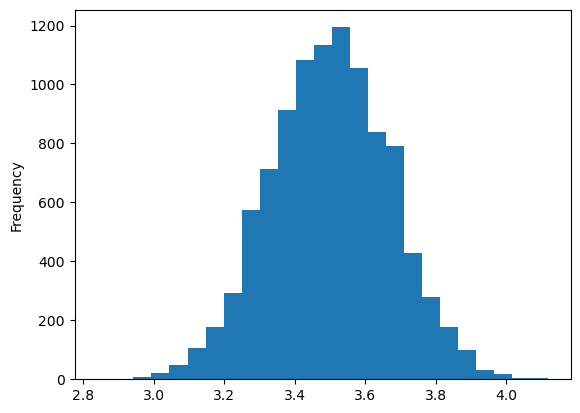

In [14]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [17]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(171.5090681264277, 174.71125952772107)

In [18]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(2.9924630242450783, 3.6475369757549214)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [19]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507367, 5.976934185159302)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)